In [1]:
def thetaB(input,k):
    return (input)/(1+input)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sympy
from sympy.solvers import solve
from sympy import Symbol

b. Plot the output functions

1. Plot ThetaB vs Kd

Text(0.5, 1.0, 'theta B vs input')

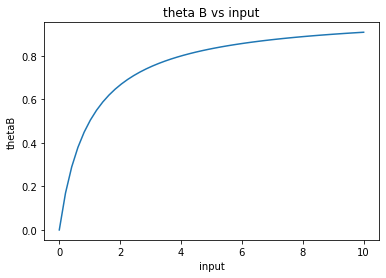

In [5]:
x = np.linspace(0.00001,10)
yTheta = thetaB(x,.1)
plt.plot(x,yTheta)
plt.xlabel('input');
plt.ylabel('thetaB');
plt.title('theta B vs input')

2. Define the function for xStar, then plot over Kd

In [6]:
def xStar(input,k):
    return (-1*(k+1-(5*thetaB(input,.1))+k*(5*thetaB(input,.1)))+sympy.sqrt(((k+1-5*thetaB(input,.1)+k*(5*thetaB(input,.1)))**2)+4*(-1+5*thetaB(input,.1))*(k*5*thetaB(input,.1))))*(1/(2*(-1+(5*thetaB(input,.1)))))

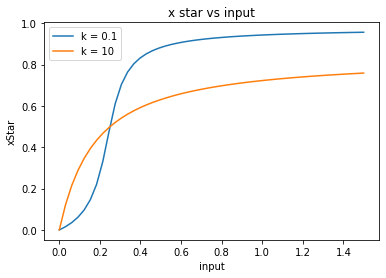

In [7]:
x = np.linspace(0.00001,1.5)
input=Symbol('input')
yxStar1 = xStar(input,0.1)
yxStar2 = xStar(input,10)
yxStar1func = sympy.lambdify(input,yxStar1)
yxStar2func = sympy.lambdify(input,yxStar2)
plt.plot(x,yxStar1func(x))
plt.plot(x,yxStar2func(x))
plt.title('x star vs input')
plt.legend(['k = 0.1','k = 10'])
plt.xlabel('input');
plt.ylabel('xStar');

3. Define the yStar function, plot over Kd

In [8]:
def yStar(input,k):
        return (-1*(k+1-(10*xStar(input,k))+k*(10*xStar(input,k)))+sympy.sqrt(((k+1-10*xStar(input,k)+k*(10*xStar(input,k)))**2)+4*(-1+10*xStar(input,k))*(k*10*xStar(input,k))))*(1/(2*(-1+10*xStar(input,k))))

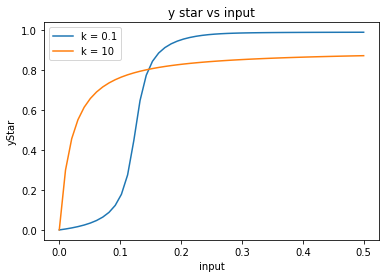

In [9]:
x = np.linspace(0.00001,.5)
input=Symbol('input')
yyStar1 = yStar(input,0.1)
yyStar2 = yStar(input,10)
yyStar1func = sympy.lambdify(input,yyStar1)
yyStar2func = sympy.lambdify(input,yyStar2)
plt.plot(x,yyStar1func(x))
plt.plot(x,yyStar2func(x))
plt.title('y star vs input')
plt.legend(['k = 0.1','k = 10'])
plt.xlabel('input');
plt.ylabel('yStar');

c. Calculate apparent Hill coefficients. Use the equation from lecture, calculating EC90 and EC10 as the input values at which 90% or 10% of max output occurs, respectively

In [10]:
import math

In [11]:
def hillCoef(EC90,EC10):
    return math.log(81)/(math.log(EC90/EC10))

In [12]:
functionList=[thetaB,xStar,yStar]

Make list of max function values

In [13]:
maxValsLowk = []
i = 0
while i < len(functionList):
    num = sympy.limit(functionList[i](input,.1),input,sympy.oo)
    maxValsLowk.append(num)
    i += 1


Calculate the Hill coefs for k = 0.1

In [14]:
lowkList=[]
i = 0
while i < len(functionList): 
    from sympy.solvers import solve
    from sympy import Symbol
    input=Symbol('input')
    y=solve(functionList[i](input,.1)-.9*(maxValsLowk[i]),input)[0]
    z=solve(functionList[i](input,.1)-.1*(maxValsLowk[i]),input)[0]
    lowkList.append(hillCoef(y,z))
    i += 1


The following list shows the k = 0.1 Hill Coefs in the order ThetaB,xStar, yStar

In [15]:
lowkList

[1.0, 3.1818257049561174, 6.6625827627342815]

High k Hill Coefs

In [18]:
maxValsHighk = []
i = 0
while i < len(functionList):
    num = sympy.limit(functionList[i](input,10),input,sympy.oo)
    maxValsHighk.append(num)
    i += 1

In [20]:
highkList=[]
i = 0
while i < len(functionList): 
    from sympy.solvers import solve
    from sympy import Symbol
    input=Symbol('input')
    y=solve(functionList[i](input,10)-.9*(maxValsHighk[i]),input)[0]
    z=solve(functionList[i](input,10)-.1*(maxValsHighk[i]),input)[0]
    highkList.append(hillCoef(y,z))
    i += 1

The following list shows the thetaB, xStar, and yStar hill coefs for k = 10

In [21]:
highkList

[1.0, 1.025162058868583, 1.0442388280616166]

d.
Calculate percent changes

In [22]:
def pctChange(initial,final):
    return ((final-initial)/initial)*100

In [23]:
listList=[]
klist=[.1,10]
for kval in klist:
    tempList=[]
    for func in functionList:
        tempList.append(pctChange(func(.1,kval),func(.15,kval)))
    listList.append(tempList)

In [24]:
listList

[[43.47826086956521, 101.826132471328, 402.579765529969],
 [43.47826086956521, 27.9659112160481, 5.65662300592676]]

The sensitivity to a small change in input is lower for higher kappa. The first list is for k=0.1, the second for k=10. The order of each list is the change for thetaB, change for xStar, change for yStar

e. The system ultrasenstivity depends upon the values of kappa. Low kappa values (low Km constants for the enzymes) result in high enzyme affinity for substrate, and hypersensitvity is observed. Modifying Km for the enzymes involved controls the degree of signal amplification.